In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('./Advertising.csv')

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [14]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


For a 2-degree ploynomial features we have total of 10 features.
- If we have to convert a 2-degree polyomials of [x,y] we got the following features [1,x,y,x*x,x*y,y*y]

In [15]:
X = df.drop('sales', axis = 1)
y = df['sales']

### Pre-Processing The Data

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
polynominal_coverter = PolynomialFeatures(degree=2, include_bias=False)

In [21]:
# help(PolynomialFeatures)

In [22]:
polynominal_feature = polynominal_coverter.fit_transform(X)

In [24]:
X.shape

(200, 3)

In [25]:
polynominal_feature.shape

(200, 9)

In [26]:
polynominal_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [29]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

If we consider x1, x2 and x3 as TV radio and newspaper respectively then x1= 230.1, x2= 37.8 and x3=69.0

Rest of the terms in polynominal_feature[0] are x1*x2, x1*x3, x2*x3, x1*x1, x2*x2, x3*x3

### Spliting the Data

In [30]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(polynominal_feature, y, test_size=0.25, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
linear_poly_regg = LinearRegression(fit_intercept=True)

- Here we could perform scaling the data with satandard scaler

In [36]:
linear_poly_regg.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
def report_model(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    print(f'the mean absolute percentage error of the {model} is {mean_absolute_percentage_error(model_pred, y_test)}')
    print(f'the mean absolute error of the {model} is {mean_absolute_error(model_pred, y_test)}')
    print(f'the mean squared error of the {model} is { np.sqrt(mean_squared_error(model_pred, y_test))}')

In [38]:
report_model(linear_poly_regg)

the mean absolute percentage error of the LinearRegression() is 0.043435713345617265
the mean absolute error of the LinearRegression() is 0.45745750468805746
the mean squared error of the LinearRegression() is 0.5797382017212311


Using polynominal regression the error is reduced from 9% to 4%
- but this results only stand for degrees of freedom is equal to 2
- we have to find the best degree of freedom for which we can achieve the best results for our model
- But selecting high degree of freedom could led to overfitting and underfitting type f probelm..

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

### Let's find the best degree of freedom

In [40]:
train_rmse_error = []

test_rmse_error = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_feature = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.25, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_rmse_error.append(train_rmse)

    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    test_rmse_error.append(test_rmse)



In [43]:
train_rmse_error

[1.73728484964822,
 0.6203940355537353,
 0.45460439252953305,
 0.36297489268597377,
 0.26134648809055944,
 0.21118181974341624,
 4.362239372954122,
 0.2274496142301711,
 0.31260572776898804]

In [44]:
test_rmse_error

[1.4521047337632071,
 0.5797382017212311,
 0.5413937449101062,
 0.5129826492269326,
 3.8091538476715754,
 6.3584704238483445,
 273.7667706895351,
 6419.485451679739,
 190186.26698280658]

So in what extend we can go for looking the best degree of freedom for a regression model?
- the ans is in the upper two arrays of error
- for train_rmse_error the error is getting lower and lower on increasing the degree of freedom,but after 6th iteration of degree of freedom, the error shoot up.. So we should stop there
- Similarly for test_rmse_error the error is getting lower and lower on increasing of the degree of freedom,but after 4th iteration of degree of freedom, the error shoot up and getting increasing afterwards...

- Our main focus is to reduce the error percetange for the best performance of our model with getting the overfitting and underfitting prblems

- So we have to find such a degree of freedom such that neither of error shoots up..

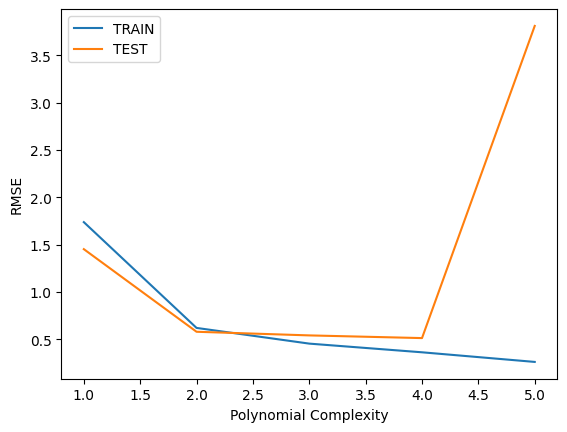

In [42]:
plt.plot(range(1,6),train_rmse_error[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_error[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

- Here we can select 3 or 4 as a degree of freedom for his problem. For 4 is oaky we can go for it but with 4 degree of freedom error might shoot up and may not perform better with unseen data.
- So go with 3 degree of freedom

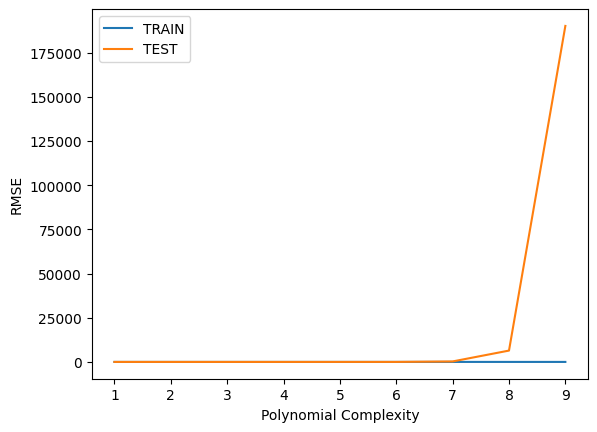

In [45]:
plt.plot(range(1,10),train_rmse_error[:9],label='TRAIN')
plt.plot(range(1,10),test_rmse_error[:9],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

- In this case looks like 7 is the optimal points but it's not the correct point as the error limit is lot higher,
- If we put a limit of error like the below example and as we can see that the 3 degree of freedom is the safe degree of freedom

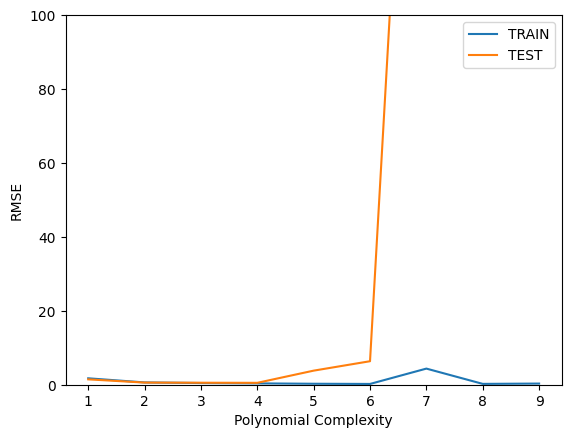

In [46]:
plt.plot(range(1,10),train_rmse_error,label='TRAIN')
plt.plot(range(1,10),test_rmse_error,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

### Retrain all the Data with the best degree of freedom

In [47]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [52]:
final_poly_features = final_poly_converter.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(final_poly_features, y, test_size=0.25, random_state=101)

In [54]:
final_model = LinearRegression()

In [55]:
final_model.fit(X_train, y_train)

LinearRegression()

In [56]:
report_model(final_model)

the mean absolute percentage error of the LinearRegression() is 0.03618239980201017
the mean absolute error of the LinearRegression() is 0.3792145673788707
the mean squared error of the LinearRegression() is 0.5413937449101062
